# BACKTESTING 

In [2]:
import os

# Imposta la directory di lavoro
os.chdir(r'C:\Users\39327\OneDrive\Desktop\USI\2 anno\financial modelling')   # Sostituisci con il percorso della tua cartella



In [3]:
import pandas as pd

# Salta le prime due righe che non ci interessano.
file_path = 'return.xlsx'  # Sostituisci con il tuo percorso

# Legge il file Excel, indicando che l'intestazione è sulla riga 2 e i dati iniziano dalla riga 4
df = pd.read_excel(file_path, header=1, skiprows=[2])

# Primo dataset: la colonna delle date e le prime 16 colonne che interessano
df1 = df.iloc[3:, :17]  # Le date sono la prima colonna, e le altre 16 colonne da mantenere

# Secondo dataset: la colonna delle date e la colonna 19
df2 = df.iloc[3:, [0, 19]]  # La colonna delle date è la prima, la colonna 19 ha indice 18 (indice parte da 0)
df1.set_index(df1.columns[0], inplace=True)
df2.set_index(df2.columns[0], inplace=True)



In [4]:
df1.head()
df2.head()

,BENCHMARK
Ticker,
2024-10-14,1889.450
2024-10-11,1883.739
2024-10-10,1876.657
2024-10-09,1878.665
2024-10-08,1873.902


In [5]:
# Forward fill missing data
df1.fillna(method='ffill', inplace=True)
df2.fillna(method='ffill', inplace=True)


C:\Users\39327\AppData\Local\Temp\ipykernel_19764\10741838.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='ffill', inplace=True)
C:\Users\39327\AppData\Local\Temp\ipykernel_19764\10741838.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2.fillna(method='ffill', inplace=True)


In [6]:
# Ordina i dati per data in ordine crescente (dalla più vecchia alla più recente)
df1 = df1.sort_index(ascending=True)
df2 = df2.sort_index(ascending=True)

# Ora puoi calcolare il rendimento percentuale
returns_df1 = df1.pct_change().dropna()
returns_df2 = df2.pct_change().dropna()

returns_df2.iloc[:,0]  # Imposta il primo valore a 0

Ticker
2018-10-18    0.003611
2018-10-19    0.003515
2018-10-22    0.005167
2018-10-23   -0.000991
2018-10-24   -0.006328
                ...   
2024-10-08    0.002437
2024-10-09    0.002542
2024-10-10   -0.001069
2024-10-11    0.003774
2024-10-14    0.003032
Name: BENCHMARK, Length: 1506, dtype: float64

In [7]:
import numpy as np

# Define the updated weights as percentages (divided by 100)
weights_percentage = np.array([6.1889, 20.196, 0, 3.027, 0, 3.194, 0, 15.156, 10, 0, 0, 13.284, 4.029, 0, 11.230, 13.694]) / 100
print(sum(weights_percentage))  # Verify that the sum of the weights is 1


# Adjust the column index as needed
returns_df1 = returns_df1.iloc[:, :16]  # Keep only the first 16 columns

# Now proceed with the calculations
weighted_returns = returns_df1.mul(weights_percentage, axis=1)

# Sum the weighted returns to obtain the portfolio returns
portfolio_returns = weighted_returns.sum(axis=1)

# Add the portfolio returns as a new column to the DataFrame
returns_df1['Portfolio Returns'] = portfolio_returns

# Display the first few rows of the updated DataFrame
returns_df1.head()


0.999989


,510300 CH Equity,SPY US Equity,XLF US Equity,XLU US equity,RXI US Equity,AIRR US,BBJP US Equity,MEUD FP Equity,GLD US Equity,VWO US,HYG US,IHYG LN Equity,TLT US Equity,ESPO US Equity,GLUX IM Equity,RBOT LN Equity,Portfolio Returns
Ticker,,,,,,,,,,,,,,,,,
2018-10-18,-0.016264,-0.014441,-0.016654,0.001491,-0.019839,-0.016578,-0.015546,0.005869,0.001123,-0.026065,-0.004225,0.001678,-0.000351,-0.027691,-0.010473,-0.011466,-0.005943
2018-10-19,-0.005561,-0.000543,0.003764,0.015634,-0.004478,-0.012006,0.000854,0.003833,0.000776,0.009274,0.000589,0.000279,-0.002194,-0.011853,0.018339,-0.006088,0.001469
2018-10-22,-0.005859,-0.004489,-0.021372,-0.006414,-0.000082,0.006711,-0.005970,-0.006787,-0.002586,0.010501,0.000471,0.000000,-0.001319,0.004136,-0.006182,0.023927,-0.000007
2018-10-23,0.002660,-0.005091,-0.008046,-0.005533,-0.001374,-0.027843,-0.012441,0.015784,0.005877,-0.009873,-0.000942,-0.000279,0.003170,-0.014116,-0.009196,0.006710,0.001036
2018-10-24,-0.023549,-0.030299,-0.025106,0.024295,-0.030909,-0.038322,-0.030843,-0.009122,0.002320,-0.029126,-0.004949,0.000279,0.007549,-0.050000,-0.001547,0.006321,-0.008182


In [8]:
# Print the column names of both dataframes to verify
print(returns_df1.columns)
print(returns_df2.columns)


Index(['510300 CH Equity', 'SPY US Equity', 'XLF US Equity', 'XLU US equity',
       'RXI US Equity', 'AIRR US', 'BBJP US Equity', 'MEUD FP Equity',
       'GLD US Equity', 'VWO US', 'HYG US', 'IHYG LN Equity', 'TLT US Equity',
       'ESPO US Equity', 'GLUX IM Equity', 'RBOT LN Equity',
       'Portfolio Returns'],
      dtype='object')
Index(['BENCHMARK'], dtype='object')


In [9]:
# Parameters
risk_free_rate = 0 / 252  # Annualized risk-free rate, divided by 252 trading days

# Function to calculate the Sharpe Ratio
def sharpe_ratio(returns, risk_free_rate):
    excess_returns = returns - risk_free_rate
    return np.mean(excess_returns) / np.std(excess_returns)

# Function to calculate the Treynor Ratio
def treynor_ratio(returns, benchmark_returns, risk_free_rate):
    beta = np.cov(returns, benchmark_returns)[0, 1] / np.var(benchmark_returns)
    return (np.mean(returns) - risk_free_rate) / beta

# Function to calculate the Sortino Ratio
def sortino_ratio(returns, risk_free_rate, mar=0):
    downside_returns = returns[returns < mar]
    downside_deviation = np.sqrt(np.mean(downside_returns ** 2))
    excess_returns = np.mean(returns - risk_free_rate)
    return excess_returns / downside_deviation

# Function to calculate the Information Ratio
def information_ratio(returns, benchmark_returns):
    active_return = returns - benchmark_returns
    tracking_error = np.std(active_return)
    return np.mean(active_return) / tracking_error

# Function to calculate the Tracking Error
def tracking_error(returns, benchmark_returns):
    return np.std(returns - benchmark_returns)

# Function to calculate Jensen's Alpha
def jensen_alpha(returns, benchmark_returns, risk_free_rate):
    beta = np.cov(returns, benchmark_returns)[0, 1] / np.var(benchmark_returns)
    expected_portfolio_return = risk_free_rate + beta * (np.mean(benchmark_returns) - risk_free_rate)
    return np.mean(returns) - expected_portfolio_return

# Function to calculate the Maximum Drawdown
def max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

# Function to calculate Upside and Downside Capture Ratios
def capture_ratio(returns, benchmark_returns):
    up_capture = np.mean(returns[benchmark_returns > 0]) / np.mean(benchmark_returns[benchmark_returns > 0])
    down_capture = np.mean(returns[benchmark_returns < 0]) / np.mean(benchmark_returns[benchmark_returns < 0])
    return up_capture, down_capture, up_capture / down_capture

# Applying the functions to calculate the various ratios for the portfolio compared to the benchmark

# Merging the two datasets on dates
merged_data = pd.merge(returns_df1[['Portfolio Returns']], returns_df2[['BENCHMARK']], left_index=True, right_index=True)

# Remove any rows with NaN values
merged_data = merged_data.dropna()

# Extract aligned returns
portfolio_returns = merged_data['Portfolio Returns']
benchmark_returns = merged_data['BENCHMARK']

# Calculating the various ratios
sharpe = sharpe_ratio(portfolio_returns, risk_free_rate)
treynor = treynor_ratio(portfolio_returns, benchmark_returns, risk_free_rate)
sortino = sortino_ratio(portfolio_returns, risk_free_rate)
information = information_ratio(portfolio_returns, benchmark_returns)
track_error = tracking_error(portfolio_returns, benchmark_returns)
alpha = jensen_alpha(portfolio_returns, benchmark_returns, risk_free_rate)
mdd = max_drawdown(portfolio_returns)
up_capture, down_capture, capture_ratio_value = capture_ratio(portfolio_returns, benchmark_returns)

# Displaying the results
print(f"Sharpe Ratio: {sharpe}")
print(f"Treynor Ratio: {treynor}")
print(f"Sortino Ratio: {sortino}")
print(f"Information Ratio: {information}")
print(f"Tracking Error: {track_error}")
print(f"Jensen's Alpha: {alpha}")
print(f"Maximum Drawdown: {mdd}")
print(f"Upside Capture: {up_capture}, Downside Capture: {down_capture}, Capture Ratio: {capture_ratio_value}")


Sharpe Ratio: 0.08339914231935402
Treynor Ratio: 0.004329765875915787
Sortino Ratio: 0.0808855833854523
Information Ratio: 0.006930676472603151
Tracking Error: 0.007904761985955418
Jensen's Alpha: 0.0003820980318667877
Maximum Drawdown: -0.2355114863889849
Upside Capture: 0.220967527508928, Downside Capture: 0.06047458589961209, Capture Ratio: 3.6538907083338192


In [10]:
def rolling_sharpe(returns, risk_free_rate, window):
    """
    Calculate rolling Sharpe ratio.
    
    :param returns: Series of portfolio returns
    :param risk_free_rate: Constant risk-free rate (or a series of risk-free rates)
    :param window: Rolling window size (in periods)
    :return: Series of Sharpe ratios
    """
    excess_returns = returns - risk_free_rate
    rolling_sharpe_ratio = excess_returns.rolling(window=window).mean() / excess_returns.rolling(window=window).std()
    return rolling_sharpe_ratio



In [11]:
def rolling_information_ratio(returns_portfolio, returns_benchmark, window):
    """
    Calculate rolling Information ratio.
    
    :param returns_portfolio: Series of portfolio returns
    :param returns_benchmark: Series of benchmark returns
    :param window: Rolling window size (in periods)
    :return: Series of Information ratios
    """
    excess_returns = returns_portfolio - returns_benchmark
    tracking_error = excess_returns.rolling(window=window).std()
    rolling_info_ratio = excess_returns.rolling(window=window).mean() / tracking_error
    return rolling_info_ratio


In [12]:
def rolling_sortino_ratio(returns, risk_free_rate, window):
    """
    Calculate rolling Sortino ratio.
    
    :param returns: Series of portfolio returns
    :param risk_free_rate: Constant risk-free rate (or a series of risk-free rates)
    :param window: Rolling window size (in periods)
    :return: Series of Sortino ratios
    """
    excess_returns = returns - risk_free_rate
    downside_returns = returns[returns < 0]
    downside_volatility = downside_returns.rolling(window=window).std()
    rolling_sortino = excess_returns.rolling(window=window).mean() / downside_volatility
    return rolling_sortino


In [13]:
def calculate_drawdowns(returns):
    """
    Calculate drawdowns and maximum drawdown.
    
    :param returns: Series of portfolio returns
    :return: DataFrame with drawdowns and max drawdown
    """
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()  # Maximum drawdown
    return drawdown, max_drawdown


Max Drawdown: -0.2355114863889849


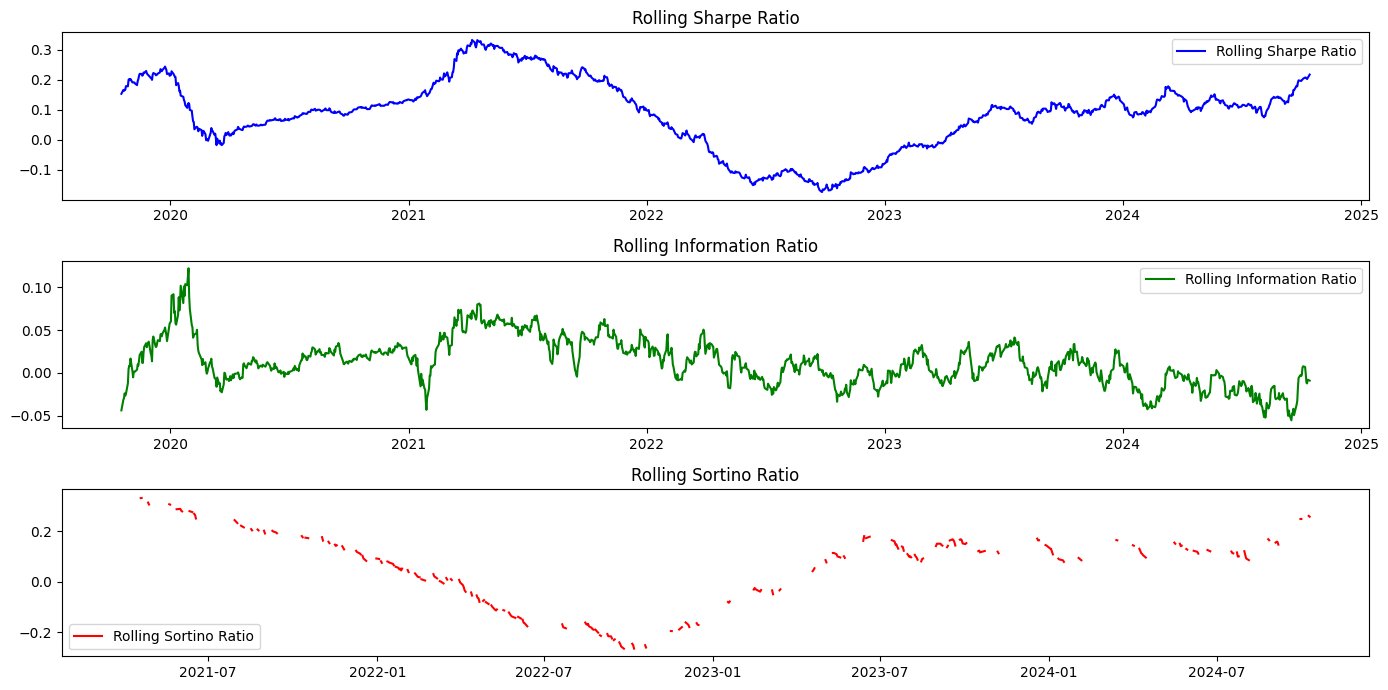

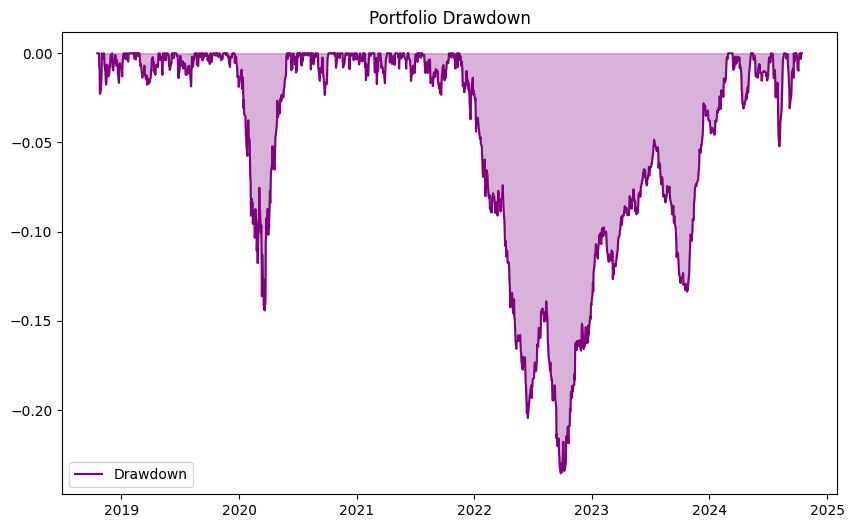

In [14]:
import matplotlib.pyplot as plt
window_size=252


rolling_sharpe_values = rolling_sharpe(portfolio_returns, risk_free_rate, window_size)
rolling_info_values = rolling_information_ratio(portfolio_returns, benchmark_returns, window_size)
rolling_sortino_values = rolling_sortino_ratio(portfolio_returns, risk_free_rate, window_size)

# Calculate drawdowns and max drawdown
drawdown_values, max_drawdown_value = calculate_drawdowns(portfolio_returns)

# Display results
print("Max Drawdown:", max_drawdown_value)

# Plot Rolling Sharpe Ratio, Information Ratio, and Sortino Ratio
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(rolling_sharpe_values, label='Rolling Sharpe Ratio', color='blue')
plt.title('Rolling Sharpe Ratio')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(rolling_info_values, label='Rolling Information Ratio', color='green')
plt.title('Rolling Information Ratio')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(rolling_sortino_values, label='Rolling Sortino Ratio', color='red')
plt.title('Rolling Sortino Ratio')
plt.legend()

plt.tight_layout()
plt.show()

# Plot drawdowns
plt.figure(figsize=(10, 6))
plt.plot(drawdown_values, label='Drawdown', color='purple')
plt.title('Portfolio Drawdown')
plt.fill_between(drawdown_values.index, drawdown_values, color='purple', alpha=0.3)
plt.legend()
plt.show()

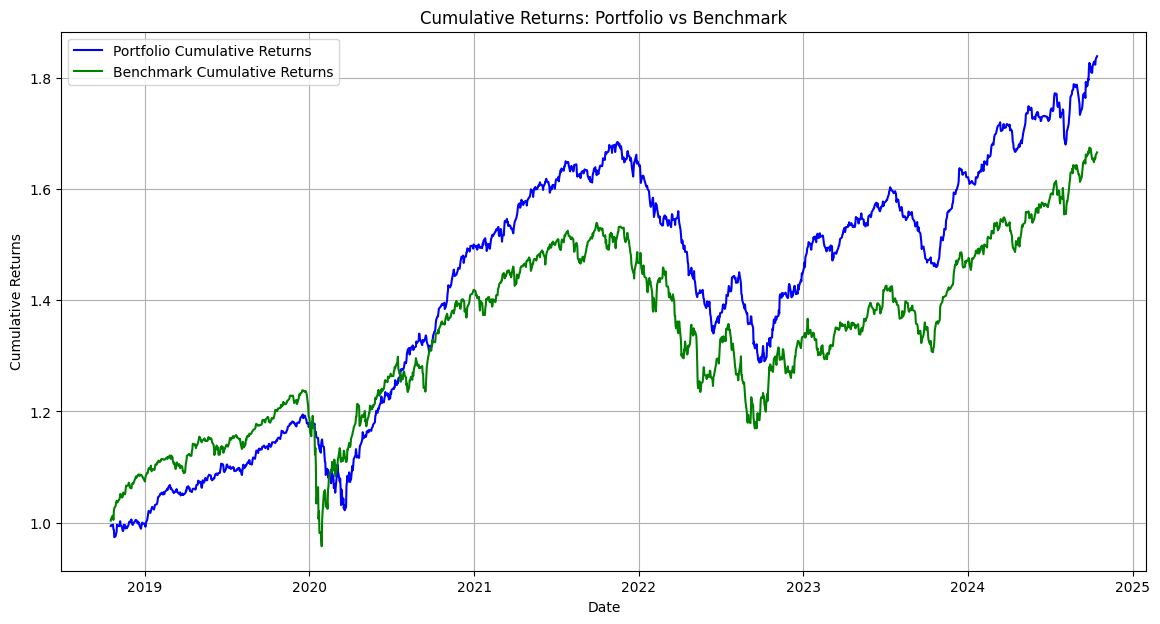

In [15]:

# Calculate cumulative returns for the portfolio and the benchmark
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod()
cumulative_benchmark_returns = (1 + benchmark_returns).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(cumulative_portfolio_returns, label='Portfolio Cumulative Returns', color='blue')
plt.plot(cumulative_benchmark_returns, label='Benchmark Cumulative Returns', color='green')
plt.title('Cumulative Returns: Portfolio vs Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# RISK MEASURES

In [16]:
def historical_var(returns, portfolio_value, confidence_level=0.95):
    """
    Calculate Historical VaR in monetary terms.
    
    :param returns: Series of portfolio returns
    :param portfolio_value: Total value of the portfolio (e.g., 100 million USD)
    :param confidence_level: Confidence level for VaR (e.g., 0.95 for 95% VaR)
    :return: VaR in monetary terms
    """
    var_percent = np.percentile(returns, (1 - confidence_level) * 100)
    var_monetary = portfolio_value * abs(var_percent)  # Convert percentage to monetary
    return var_monetary


 
def parametric_var(returns, portfolio_value, confidence_level=0.95):
    """
    Calculate Parametric (Gaussian) VaR in monetary terms.
    
    :param returns: Series of portfolio returns
    :param portfolio_value: Total value of the portfolio (e.g., 100 million USD)
    :param confidence_level: Confidence level for VaR (e.g., 0.95 for 95% VaR)
    :return: VaR in monetary terms
    """
    mean = returns.mean()
    std_dev = returns.std()
    
    # Z-score for the confidence level (e.g., 1.645 for 95% VaR)
    z = abs(np.percentile(np.random.randn(10000), (1 - confidence_level) * 100))
    
    # Calculate VaR as a percentage of the portfolio
    var_percent = mean - z * std_dev
    
    # Convert to monetary value
    var_monetary = portfolio_value * abs(var_percent)
    
    return var_monetary

def monte_carlo_var(returns, portfolio_value, confidence_level=0.95, num_simulations=10000):
    """
    Calculate Monte Carlo VaR in monetary terms.
    
    :param returns: Series of portfolio returns
    :param portfolio_value: Total value of the portfolio (e.g., 100 million USD)
    :param confidence_level: Confidence level for VaR (e.g., 0.95 for 95% VaR)
    :param num_simulations: Number of simulations for Monte Carlo
    :return: VaR in monetary terms
    """
    mean = returns.mean()
    std_dev = returns.std()
    
    # Simulate returns based on the portfolio's historical mean and standard deviation
    simulated_returns = np.random.normal(mean, std_dev, num_simulations)
    
    # Calculate VaR as a percentage of the portfolio
    var_percent = np.percentile(simulated_returns, (1 - confidence_level) * 100)
    
    # Convert to monetary value
    var_monetary = portfolio_value * abs(var_percent)
    
    return var_monetary



In [17]:
confidence_level = 0.95  # 95% confidence level
value=100
# Calculate Historical VaR
historical_var_value = historical_var(portfolio_returns, value, confidence_level)
parametric_var_value = parametric_var(portfolio_returns,value, confidence_level)
monte_carlo_var_value = monte_carlo_var(portfolio_returns, value, confidence_level)

print(f"Historical VaR: ${historical_var_value:,.2f} million")
print(f"Parametric VaR: ${parametric_var_value:,.2f} million")
print(f"Monte Carlo VaR: ${monte_carlo_var_value:,.2f} million")

Historical VaR: $0.76 million
Parametric VaR: $0.80 million
Monte Carlo VaR: $0.77 million


In [18]:
def historical_es(returns, portfolio_value, confidence_level=0.95):
    """
    Calcola l'Expected Shortfall (ES) usando un approccio storico in termini monetari.
    
    :param returns: Serie di rendimenti del portafoglio
    :param portfolio_value: Valore totale del portafoglio (ad esempio, 100 milioni USD)
    :param confidence_level: Livello di confidenza (es. 0.95 per il 95% ES)
    :return: ES in termini monetari
    """
    # Calcola il VaR storico
    var_percent = np.percentile(returns, (1 - confidence_level) * 100)
    
    # Calcola l'Expected Shortfall come la media delle perdite oltre il VaR
    expected_shortfall_percent = returns[returns <= var_percent].mean()
    
    # Converti in valore monetario
    es_monetary = portfolio_value * abs(expected_shortfall_percent)
    
    return es_monetary

def parametric_es(returns, portfolio_value, confidence_level=0.95):
    """
    Calcola l'Expected Shortfall (ES) usando un approccio parametrico (gaussiano) in termini monetari.
    
    :param returns: Serie di rendimenti del portafoglio
    :param portfolio_value: Valore totale del portafoglio (ad esempio, 100 milioni USD)
    :param confidence_level: Livello di confidenza (es. 0.95 per il 95% ES)
    :return: ES in termini monetari
    """
    mean = returns.mean()
    std_dev = returns.std()
    
    # Z-score per il livello di confidenza (ad esempio, Z=1.645 per il 95%)
    z = abs(np.percentile(np.random.randn(10000), (1 - confidence_level) * 100))
    
    # Calcola il VaR parametrico
    var_percent = mean - z * std_dev
    
    # Expected Shortfall per una distribuzione normale
    es_percent = mean - (std_dev * (np.exp(-z**2 / 2) / (np.sqrt(2 * np.pi) * (1 - confidence_level))))
    
    # Converti in valore monetario
    es_monetary = portfolio_value * abs(es_percent)
    
    return es_monetary

def monte_carlo_es(returns, portfolio_value, confidence_level=0.95, num_simulations=10000):
    """
    Calcola l'Expected Shortfall (ES) usando un approccio Monte Carlo in termini monetari.
    
    :param returns: Serie di rendimenti del portafoglio
    :param portfolio_value: Valore totale del portafoglio (ad esempio, 100 milioni USD)
    :param confidence_level: Livello di confidenza (es. 0.95 per il 95% ES)
    :param num_simulations: Numero di simulazioni per Monte Carlo
    :return: ES in termini monetari
    """
    mean = returns.mean()
    std_dev = returns.std()
    
    # Simuliamo i rendimenti basati sulla media e la deviazione standard storica
    simulated_returns = np.random.normal(mean, std_dev, num_simulations)
    
    # Calcoliamo il VaR per i rendimenti simulati
    var_percent = np.percentile(simulated_returns, (1 - confidence_level) * 100)
    
    # Calcoliamo l'Expected Shortfall come la media dei rendimenti peggiori del VaR
    expected_shortfall_percent = simulated_returns[simulated_returns <= var_percent].mean()
    
    # Converti in valore monetario
    es_monetary = portfolio_value * abs(expected_shortfall_percent)
    
    return es_monetary



In [19]:
historical_es_value = historical_es(portfolio_returns, value, confidence_level)
parametric_es_value = parametric_es(portfolio_returns, value, confidence_level)
monte_carlo_es_value = monte_carlo_es(portfolio_returns, value, confidence_level)

print(f"Historical ES: ${historical_es_value:,.2f}")
print(f"Parametric ES: ${parametric_es_value:,.2f}")
print(f"Monte Carlo ES: ${monte_carlo_es_value:,.2f}")

Historical ES: $1.13
Parametric ES: $1.05
Monte Carlo ES: $1.01


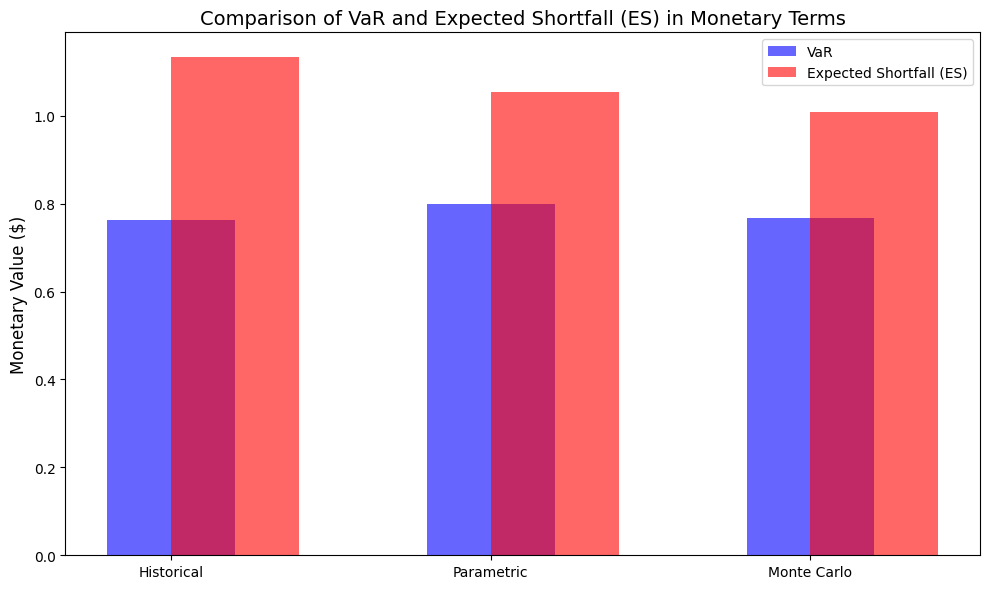

In [20]:
# Create a DataFrame to store and compare the results
results_df = pd.DataFrame({
    'VaR': [historical_var_value, parametric_var_value, monte_carlo_var_value],
    'ES': [historical_es_value, parametric_es_value, monte_carlo_es_value]
}, index=['Historical', 'Parametric', 'Monte Carlo'])

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

# Plot VaR values
ax.bar(results_df.index, results_df['VaR'], label='VaR', alpha=0.6, color='blue', width=0.4, align='center')

# Plot ES values slightly shifted to the right for comparison
ax.bar(results_df.index, results_df['ES'], label='Expected Shortfall (ES)', alpha=0.6, color='red', width=0.4, align='edge')

# Customize the plot
ax.set_title('Comparison of VaR and Expected Shortfall (ES) in Monetary Terms', fontsize=14)
ax.set_ylabel('Monetary Value ($)', fontsize=12)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

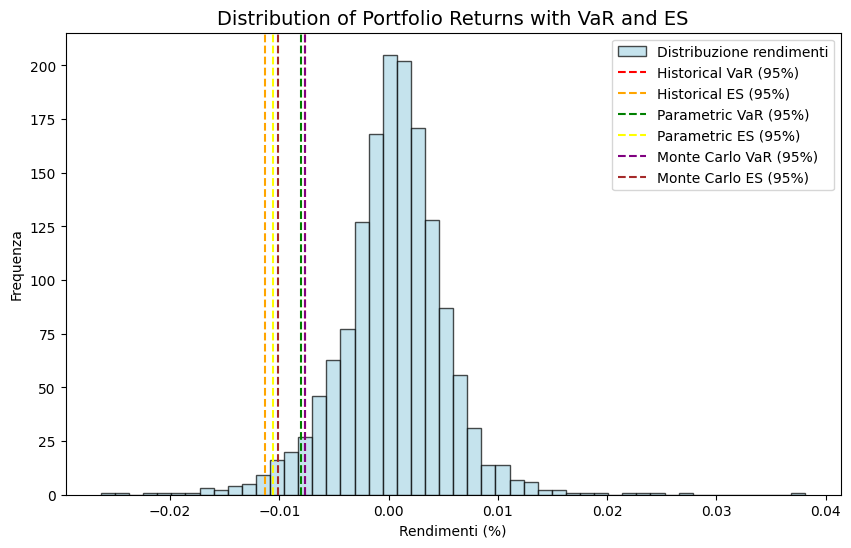

In [22]:
# Normalizza (dividi per il valore del portafoglio) e metti il segno negativo
historical_var_pct = -(historical_var_value / value)
historical_es_pct = -(historical_es_value / value)
parametric_var_pct = -(parametric_var_value / value)
parametric_es_pct = -(parametric_es_value /value)

monte_carlo_var_pct = -(monte_carlo_var_value / value)
monte_carlo_es_pct = -(monte_carlo_es_value / value)
# Creazione del grafico della distribuzione dei rendimenti con i VaR e ES
plt.figure(figsize=(10, 6))

# Istogramma della distribuzione dei rendimenti
plt.hist(portfolio_returns, bins=50, color='lightblue', edgecolor='black', alpha=0.7, label='Distribuzione rendimenti')

# Linee VaR e ES
plt.axvline(historical_var_pct, color='red', linestyle='--', label=f'Historical VaR ({confidence_level*100:.0f}%)')
plt.axvline(historical_es_pct, color='orange', linestyle='--', label=f'Historical ES ({confidence_level*100:.0f}%)')

plt.axvline(parametric_var_pct, color='green', linestyle='--', label=f'Parametric VaR ({confidence_level*100:.0f}%)')
plt.axvline(parametric_es_pct, color='yellow', linestyle='--', label=f'Parametric ES ({confidence_level*100:.0f}%)')

plt.axvline(monte_carlo_var_pct, color='purple', linestyle='--', label=f'Monte Carlo VaR ({confidence_level*100:.0f}%)')
plt.axvline(monte_carlo_es_pct, color='brown', linestyle='--', label=f'Monte Carlo ES ({confidence_level*100:.0f}%)')

# Personalizzazioni del grafico
plt.title('Distribution of Portfolio Returns with VaR and ES', fontsize=14)
plt.xlabel('Rendimenti (%)')
plt.ylabel('Frequenza')
plt.legend()

# Visualizzazione del grafico
plt.show()